## Praca domowa 4

#### Autor: Łukasz Tomaszewski

### Zadanie 1 (1.5 pkt)

Używając funkcji z pakietu `numpy` oraz `pandas` odpowiedz na poniższe pytania dotyczące zbioru danych o grach.

a) Wybierz gry, które zostały wydane po 2015 roku przez Nintendo oraz ich sprzedaż w Ameryce była niższa niż w Europie.  

b) Jak rodzaj gry zarobił najwięcej w roku 2010?

c) Jakie typy gier sprzedają się średnio lepiej w Japonii niż w Europie? Jakie to typy gier i jaka jest ta wartość średnia. Wynikiem powinna być tabelka posortowana względem średnich. Nazwij kolumny `Typ Gry` i `Średnia sprzedaż w Japonii`.


In [1]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/R-Ladies-Warsaw/PoweR/master/Cz%C4%99%C5%9B%C4%87%202%20-%20Formatowanie%20danych/Python/data/vgsales.csv",
                delimiter = ",").dropna().reset_index(drop = True)

##### Podpunkt a

In [2]:
df.loc[(df.Publisher == "Nintendo") & (df.Year > 2015) & (df.NA_Sales < df.EU_Sales)].reset_index(drop = True)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,4263,Mario & Sonic at the Rio 2016 Olympic Games,3DS,2016.0,Action,Nintendo,0.04,0.16,0.24,0.01,0.46
1,6590,Mario & Sonic at the Rio 2016 Olympic Games,WiiU,2016.0,Action,Nintendo,0.03,0.11,0.10,0.01,0.26
2,14971,Teddy Together,3DS,2016.0,Simulation,Nintendo,0.00,0.02,0.00,0.00,0.02


##### Podpunkt b

In [3]:
df.loc[df.Year==2010].groupby("Genre").Global_Sales.agg("sum").sort_values(ascending = False).to_frame().reset_index().loc[[0]]

,Genre,Global_Sales
0,Action,117.64


###### Podpunkt c

In [4]:
df = df.groupby("Genre").agg("mean").reset_index()
df.loc[df.JP_Sales > df.EU_Sales].loc[:,["Genre","JP_Sales"]].\
sort_values(by = "JP_Sales", ascending = False).reset_index(drop=True).\
rename(columns = {"Genre" : "Typ Gry", "JP_Sales" : "Średnia sprzedaż w Japonii"})

,Typ Gry,Średnia sprzedaż w Japonii
0,Role-Playing,0.238293
1,Puzzle,0.099439
2,Strategy,0.073284


### Zadanie 2 (3.5 pkt)

Wykorzystując narzędzie do wizualizacji w Pythonie (matplotlib, seaborn) należy poprawić wykres, który był rozwiązaniem pracy domowej 2 (najlepiej poprawić swoją pracę domową, ale można też cudzą).

Rozwiązanie powinno zawierać:

1) oryginalny wykres wraz ze źródłem

2) wykres w ggplot2 wraz z linkiem do pracy domowej w której się on pojawił (kod nie jest potrzebny)

3) poprawiony wykres z punktu 2) w Pythonie

4) uzasadnienie, czemu wykres w Pythonie jest lepszy od dwóch pozostałych.

##### 1)

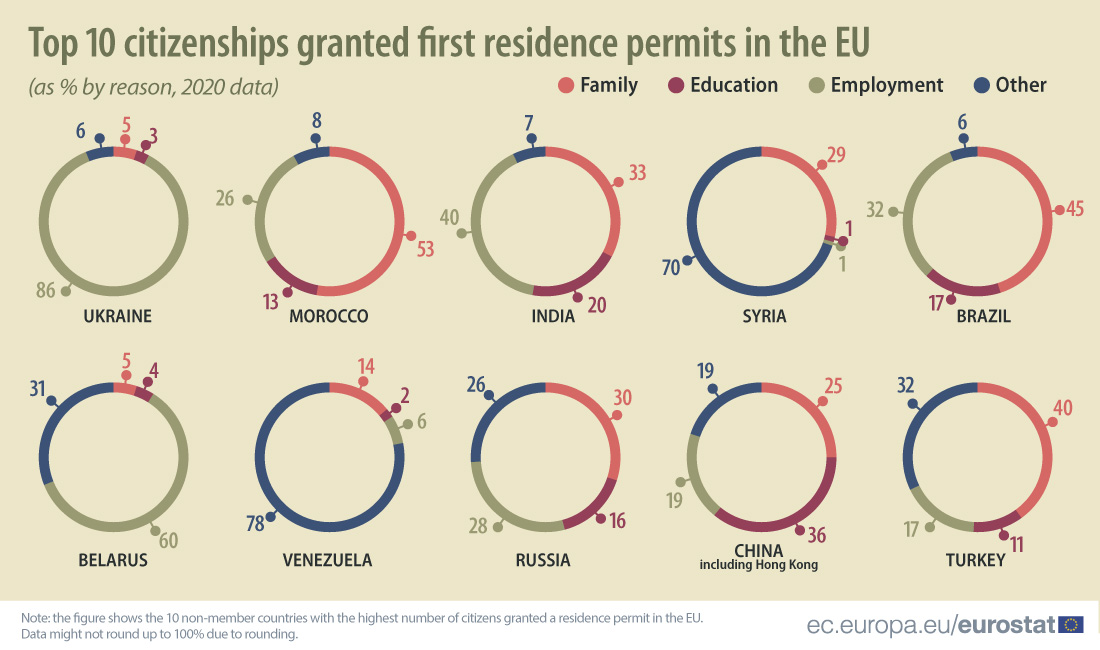
Zródło wizualizacji: https://next.gazeta.pl/next/7,151003,27676154,migranci-w-polsce-wydajemy-najwiecej-pozwolen-ze-wszystkich.html

##### 2)

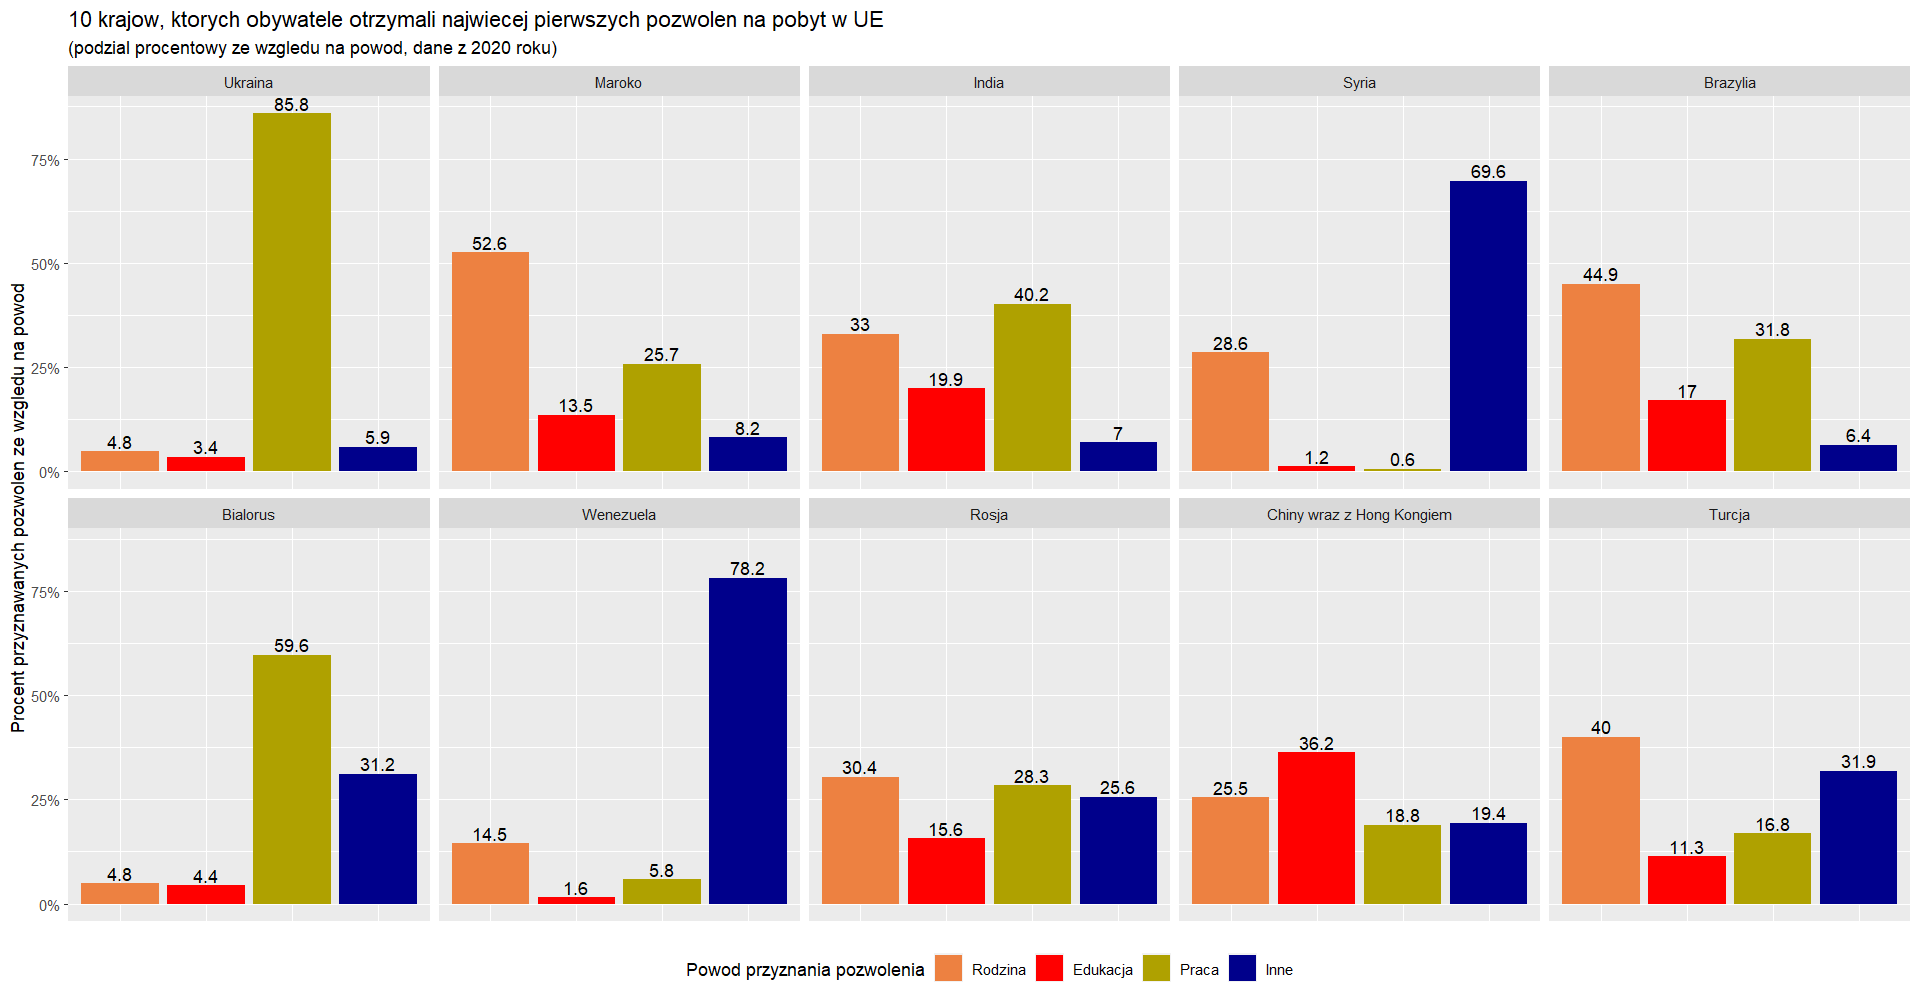
Link do pracy domowej: https://github.com/mini-pw/2022Z-DataVisualizationTechniques/blob/main/homeworks/hw2/Tomaszewski%C5%81ukasz/HW2.pdf

##### 3)

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("C:\\Users\\ltoma\\OneDrive\\Pulpit\\R\\HW2\\Dane.csv")
df['Procent'] = df['Procent'].apply(lambda x: x*100)
df


,reason,citizen,OBS_VALUE,Procent,TOTAL
0,Edukacja,Ukraina,20559,3.419507,601227
1,Rodzina,Ukraina,29092,4.838771,601227
2,Praca,Ukraina,516005,85.825321,601227
3,Inne,Ukraina,35571,5.916401,601227
4,Edukacja,Maroko,16662,13.497509,123445
5,Rodzina,Maroko,64887,52.563490,123445
6,Praca,Maroko,31785,25.748309,123445
7,Inne,Maroko,10111,8.190692,123445
8,Edukacja,India,15747,19.864267,79273
9,Rodzina,India,26170,33.012501,79273


In [7]:
df['citizen'] = pd.Categorical(df['citizen'], ["Ukraina", "Maroko", "India","Syria","Brazylia","Bialorus","Wenezuela","Rosja","Chiny wraz z Hong Kongiem","Turcja"])
df['reason'] = pd.Categorical(df['reason'], ["Rodzina", "Edukacja", "Praca","Inne"])
df = df.sort_values(['citizen','reason'])


[]

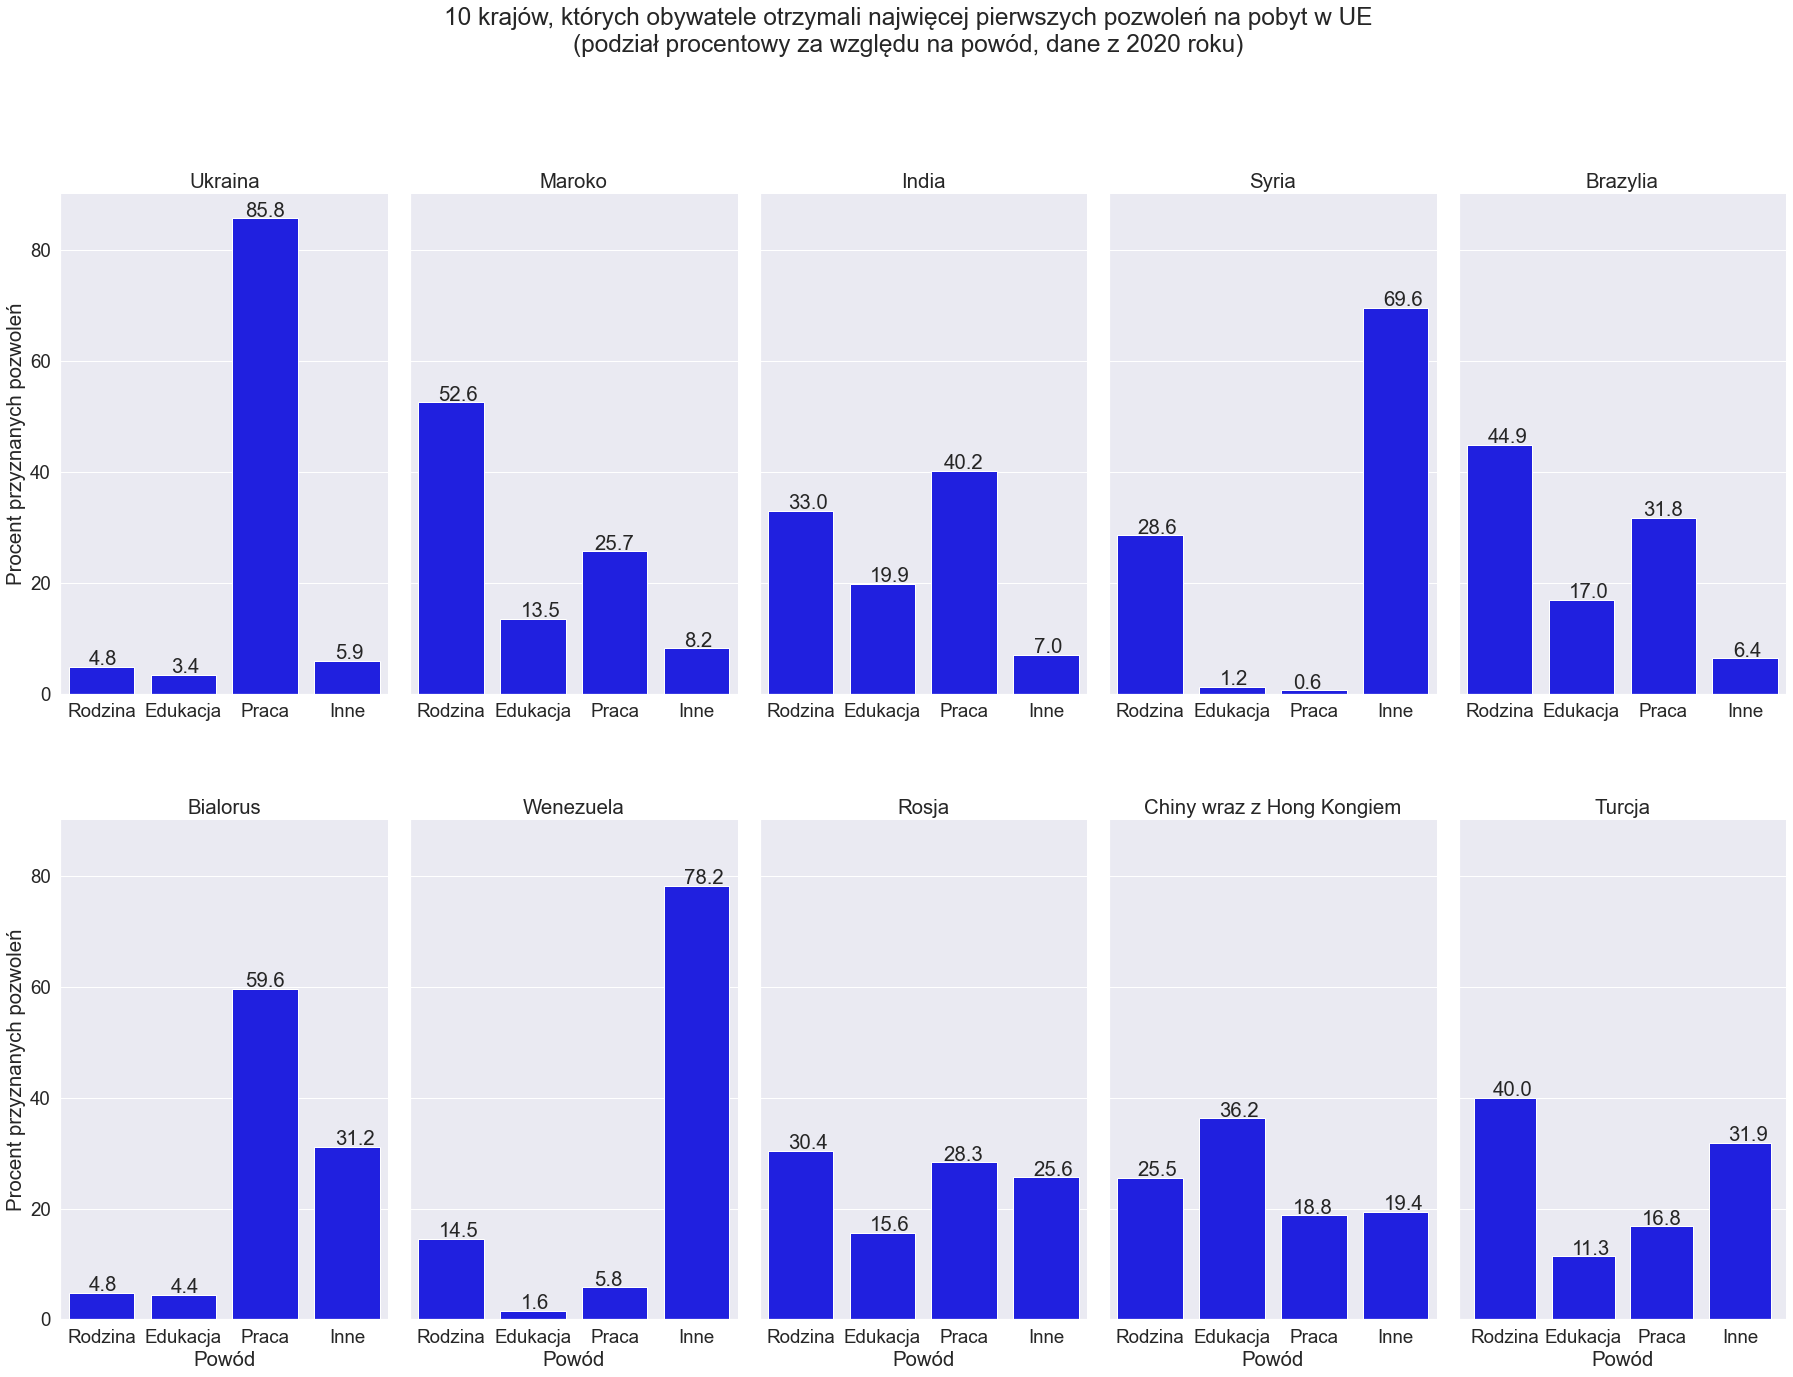

In [8]:
sns.set_theme(style="whitegrid")
sns.set(font_scale=1.7)

g = sns.catplot(x='reason', 
                   y='Procent', 
                   data=df,
                   color = "blue",
                   col='citizen',
                   kind='bar',
               col_wrap = 5,
               sharex=False)
g.fig.set_size_inches(25,20)
g.fig.subplots_adjust(top=0.85)

g.fig.suptitle("10 krajów, których obywatele otrzymali najwięcej pierwszych pozwoleń na pobyt w UE\n(podział procentowy za względu na powód, dane z 2020 roku)")
g.set_xlabels('Powód')
g.set_ylabels('Procent przyznanych pozwoleń')
(g.set_titles("{col_name}"))

x=df.loc[:,"Procent"].tolist()
round_x = [round(num, 1) for num in x]
round_x
j=0
for i in range(10):
    ax = g.facet_axis(0,i)
    ax.text(-0.15,round_x[j]+0.3,round_x[j])
    j+=1
    ax.text(0.85,round_x[j]+0.3,round_x[j])
    j+=1
    ax.text(1.75,round_x[j]+0.3,round_x[j])
    j+=1
    ax.text(2.85,round_x[j]+0.3,round_x[j])
    j+=1
    
plt.plot()

##### 4)

Dane na oryginalnym wykresie zostały przedstawione za pomocą wykresów pierścieniowych, których odczytanie może być problematyczne. Odbiorca nie jest w stanie porównać w szybki sposób danych na nich zawartych, zwłaszcza, że te nie są posegregowane względem zaznaczonego obszaru. Dodatkowo zamalowana część nie odpowiada dokładnym danym, a danym zaokrąglonym. W swojej wizualizacji postanowiłem przedstawić dane za pomocą wykresów słupkowych, które lepiej przedstawiają zawarte na nich informacje. Do wykonania wizualizacji wykorzystałem surowe dane. Dzięki temu wykresy są bardziej dokładne. Tekst mówiący o wartości danego słupka też jest dokłdaniejszy niż w oryginale, ponieważ został on zaokrąglony w mniejszym stopniu.
Dodatkowo wykres jest lepszy niż ten zrobiony w ggplot2, ponieważ zamiast używania koloru, została podpisana oś x.
Słupki zaczynają się na samym dole wykresu, a nie jak w przypadku wykresu z ggplot2, po marginesie.